In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

Let us first generate data which follows y = 5x + 6 + delta.

(100,)
(100,)


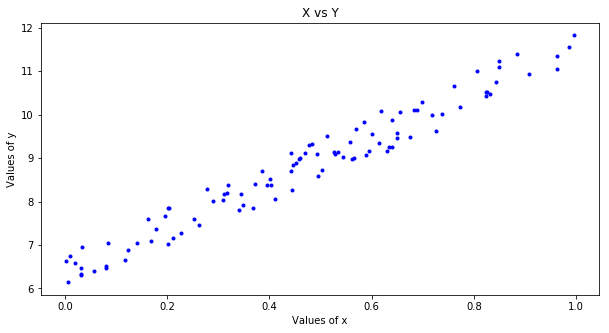

In [34]:
# Generate data
x = np.random.rand(100)
delta = np.random.rand(100)
y = 5 * x + 6 + delta

print(x.shape)
print(y.shape)

# Plot data
plt.figure(figsize = (10, 5))
plt.plot(x,y, 'b.')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.title("X vs Y")
plt.show()



Define loss function

In [5]:
# Loss function
def loss(y, y_predicted):
    return np.mean(np.square(y-y_predicted))

Define Gradient Descent

In [6]:
def get_grad(x_data, y_data, m, c):
    m_grad = np.mean((y_data - (m*x_data+c))*(-x_data))
    c_grad = np.mean((y_data - (m*x_data+c))*(-1))
    return m_grad, c_grad

In [10]:
# Get indices of samples for training, validation and testing
indices = np.random.permutation(x.shape[0])
training_idx, val_idx, test_idx = indices[:60], indices[20:80], indices[80:100]

In [9]:
# Split x into training and testing data
x_train = x[training_idx]
x_val = x[val_idx]
x_test = x[test_idx]

# Split y into training and testing data
y_train = y[training_idx]
y_val = y[val_idx]
y_test = y[test_idx]

In [12]:
# Set random.seed value
np.random.seed(40)

# Initialize m and c values
m0 = float(np.random.rand(1))
c0 = float(np.random.rand(1))

print(m0)
print(c0)

# Create empty lists to store intermediate m, c, loss functions
m_vec = []; c_vec = []; loss_val_vec = []; loss_train_vec = []

# NumberOfIterations
NumberOfIterations = 40

# Learning rate
lr = 0.1
for i in range(0, 500):
    m_grad, c_grad = get_grad(x_train, y_train, m0, c0)
    m0 = m0 - lr * m_grad
    c0 = c0 - lr * c_grad
    loss_train = loss(y_train, (m0*x_train+c0))
    loss_val = loss(y_val, (m0*x_val+c0))
    
    m_vec.append(m0)
    c_vec.append(c0)
    loss_val_vec.append(loss_val)
    loss_train_vec.append(loss_train)
    
print("Final m and c values are m_final = {:2.2f}, c_final = {:2.2f}".format(m0,c0))

0.4076870280802861
0.05536604011186008
Final m and c values are m_final = 4.90, c_final = 6.51


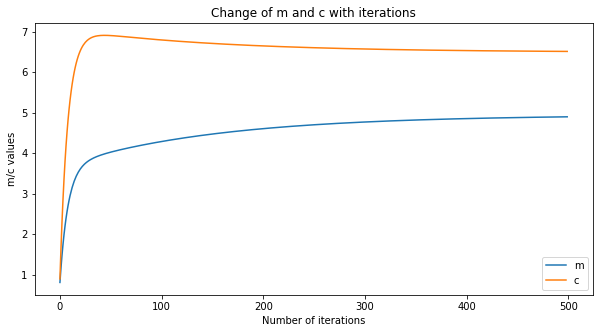

In [13]:
# Visualizing change in m and c with number of iterations
plt.figure(figsize=(10,5))
plt.plot(m_vec, label='m')
plt.plot(c_vec, label='c')
plt.title('Change of m and c with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("m/c values")
plt.legend(); plt.show()

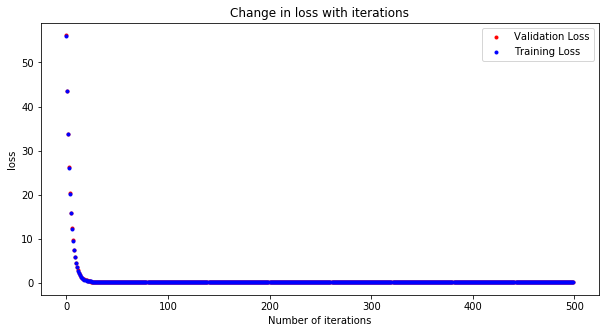

In [14]:
# Visualizing loss with number of iterations
plt.figure(figsize=(10,5))
plt.plot(loss_val_vec, "r.", label = "Validation Loss")
plt.plot(loss_train_vec, "b.", label = "Training Loss")
plt.title('Change in loss with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("loss")
plt.legend(); plt.show()

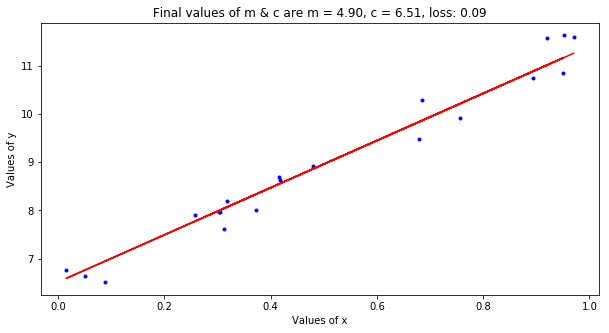

In [18]:
# Visualizaing final line on data
m = m0; c = c0
y_pred = m * x_test + c
#y_pred = m * x + c
plt.figure(figsize=(10,5))
plt.plot(x_test, y_test, "b.")
plt.plot(x_test, y_pred, '-', color = 'r')
plt.title('Final values of m & c are m = {:2.2f}, c = {:2.2f}, loss: {:2.2f}'.format(m, c, loss(y_test,y_pred)))
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()


It's a long process!!! isn't it?

Let's use sklearn to build the same regression line 

In [22]:
# Import necessary packages
import sklearn
from sklearn.linear_model import LinearRegression

Get Linear Regression model object

In [23]:
lm = LinearRegression()

In [24]:
# Fit linear regression on x and y
lm.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[0.75750882 0.41689115 0.44764013 0.37847926 0.14537905 0.69035171
 0.81429456 0.86738755 0.07365882 0.01105633 0.45343306 0.15525324
 0.46066976 0.50977382 0.08433961 0.68824848 0.28138901 0.41098813
 0.60967702 0.19479973 0.32113463 0.30579818 0.70352115 0.51381228
 0.03763126 0.12751049 0.76937668 0.78854835 0.22037063 0.04300314
 0.16518072 0.58798478 0.76805749 0.27673722 0.03429517 0.14579318
 0.92726927 0.84309045 0.35151211 0.82607651 0.6585349  0.45140731
 0.27041689 0.69680431 0.13275264 0.80958238 0.93390286 0.06059737
 0.02178901 0.27997674 0.0682326  0.57301125 0.47731403 0.77410673
 0.62923732 0.43852465 0.05163458 0.55686968 0.12475171 0.74410466].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

It seems dimensions are not correct. Let's check them.

In [25]:
# Let us check the shape of x
print(x_train.shape)

# Let us check the shape of xy
print(y_train.shape)

(60,)
(60,)


we need to give shape of (M, N) and not (M, ). So let's reshape them.

You need to give column vector for x and y

In [26]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [27]:
# Shape of x
x.shape

(100, 1)

In [28]:
# Shape of y
y.shape

(100, 1)

Fit linear regression model on data

In [29]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Get slope and intercept

In [30]:
# lm.intercept_
c_pred = lm.intercept_
c_pred

array([6.5033027])

In [31]:
# lm.coef_
m_pred = lm.coef_
m_pred

array([[4.93971806]])

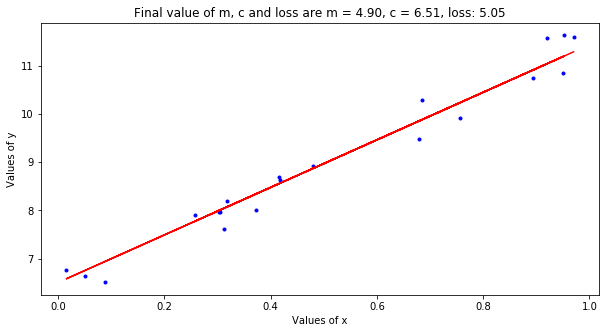

In [35]:
# Visualizaing final line on data

y_pred = lm.predict(x_test.reshape(-1,1))
plt.figure(figsize=(10,5))
plt.plot(x_test, y_test, "b.")
plt.plot(x_test, y_pred, "-", color = 'r')
plt.title('Final value of m, c and loss are m = {:2.2f}, c = {:2.2f}, loss: {:2.2f}'.format(m, c, loss(y_test,y_pred)))
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

Using sklearn you need not define loss function and gradient descent. Sklearn takes care of everything.

### Excercises 

    1) Build linear regression from scratch using x1, x2, x3 (3 features) and target label(y).
    2) Experiement with different learning rates and see how you reach global minima. Does learning rate have effect          on number of iteractions?
    3) Build linear regression on Kaggle House Prices: Advanced Regression Techniques dataset using any two features          of dataset and sklearn. ( Remember pd.read_csv to load csv file?)